In [1]:
!pip install yfinance 

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.9.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=de1cf7d5bca0d4437b02c5f329c271bb71580f8268dbe458bc3173038a47a22d
  Stored in directory: c:\users\123\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [3]:
!pip install matplotlib

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.15

In [3]:
!pip install scikit-learn

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
# Download full TSLA stock data from yfinance
data = yf.download('TSLA')  # No start or end date means full history
data = data[['Close']].dropna()

[*********************100%***********************]  1 of 1 completed


In [23]:
# Save to CSV
data.to_csv('TSLA_full_data.csv')

In [25]:
print(" TSLA data saved as 'TSLA_full_data.csv'")

 TSLA data saved as 'TSLA_full_data.csv'


In [27]:
print(data.head())  # First 5 rows of original closing prices

Price          Close
Ticker          TSLA
Date                
2010-06-29  1.592667
2010-06-30  1.588667
2010-07-01  1.464000
2010-07-02  1.280000
2010-07-06  1.074000


In [31]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [33]:
print("\nScaled Data Matrix:")
print(scaled_data[:5])  # First 5 rows of normalized prices


Scaled Data Matrix:
[[1.12641280e-03]
 [1.11805880e-03]
 [8.57688465e-04]
 [4.73399704e-04]
 [4.31634707e-05]]


In [39]:
# Create the LSTM input matrix (X) and target vector (y)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60  # 60 days as input sequence
X, y = create_dataset(scaled_data, time_step)

In [41]:
# Display first 5 rows of input matrix (X)
print("\n Input Matrix X (First 5 sequences):")
print(X[:5])  # First 5 sequences from X

# Display first 10 values of the target vector (y)
print("\n Target Vector y (First 10 values):")
print(y[:10])  # First 10 target values



 Input Matrix X (First 5 sequences):
[[1.12641280e-03 1.11805880e-03 8.57688465e-04 4.73399704e-04
  4.31634707e-05 0.00000000e+00 2.31130854e-04 2.22776609e-04
  1.74045136e-04 3.25809799e-04 5.62510895e-04 5.69471894e-04
  6.73898329e-04 8.50727466e-04 6.26557611e-04 6.15419615e-04
  7.24022798e-04 7.64400276e-04 7.17061799e-04 6.61367087e-04
  6.85036325e-04 6.33520851e-04 5.76432893e-04 7.12884802e-04
  8.56295468e-04 7.60223278e-04 6.47442848e-04 5.27701420e-04
  5.29094416e-04 4.49730465e-04 2.92393569e-04 2.50623094e-04
  3.50872282e-04 4.14920990e-04 4.66438705e-04 4.13527994e-04
  4.16313986e-04 4.59475465e-04 6.02888373e-04 4.73399704e-04
  5.70864890e-04 5.49979653e-04 5.43016663e-04 5.66687893e-04
  5.12386177e-04 6.47442848e-04 7.32377042e-04 7.30983797e-04
  6.59974090e-04 7.10098560e-04 6.83645320e-04 6.08458367e-04
  6.85036325e-04 7.40731037e-04 8.60472466e-04 7.15668803e-04
  6.16812611e-04 7.32377042e-04 6.91999564e-04 5.66687893e-04]
 [1.11805880e-03 8.57688465e-04

In [45]:
# Reshape for LSTM input: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [47]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [49]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\123\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0039
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 4.3256e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.9183e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 3.6621e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.6823e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.5913e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.1409e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 2.1620e-04
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 2.2277e-04
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 1.9961e-04


In [53]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform predictions
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual prices

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


Plot the results

In [55]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

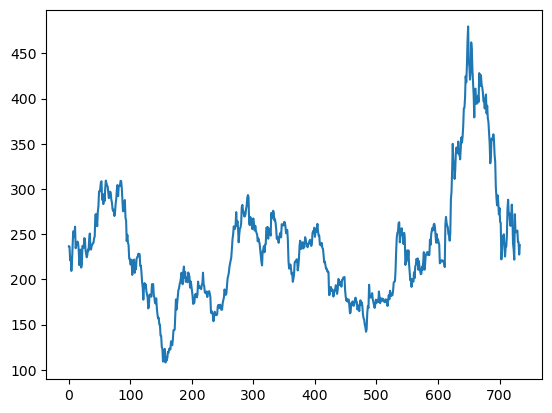

In [57]:
plt.plot(real_prices, label='Actual TSLA Price')

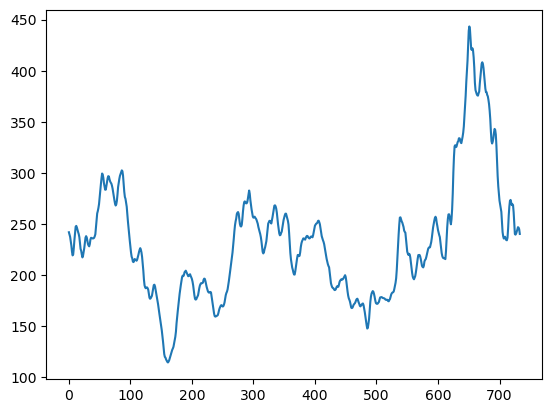

In [59]:
plt.plot(predictions, label='Predicted TSLA Price')

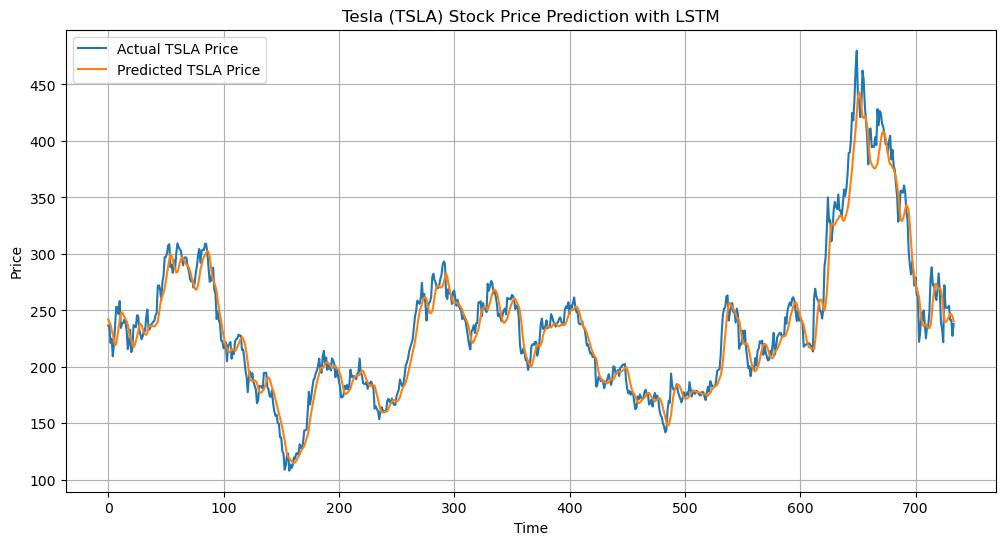

In [89]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Actual TSLA Price')
plt.plot(predictions, label='Predicted TSLA Price')
plt.title('Tesla (TSLA) Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()